### Polynomial regression using numpy liabrary

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv("curve.csv")

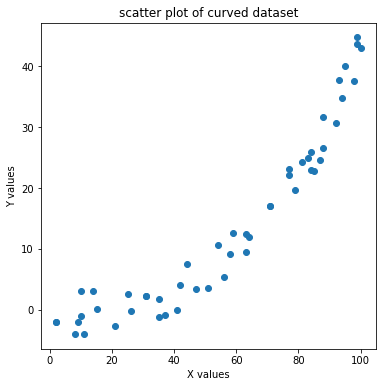

In [47]:
plt.figure(figsize=(6,6))
plt.scatter(df.x, df.y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("scatter plot of curved dataset")
plt.show()

In [23]:
# plot poly fit funtions
def fit_poly(degree):
    p = np.polyfit(df.x, df.y, deg = degree)
    df['fit'] = np.polyval(p, df.x)
    plt.figure(figsize=(6,6))
    sns.regplot(df.x, df.y, fit_reg=False)
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title(f'Reg fit with degree of {degree}')
    return plt.plot(df.x, df.fit, label='fit')

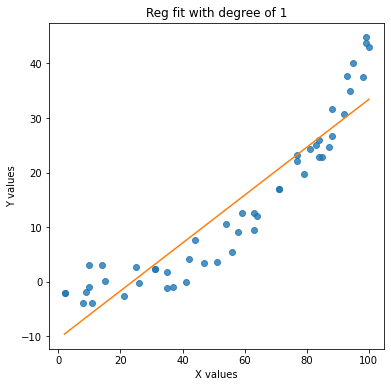

In [25]:
# with degree of 1
fit_poly(1)

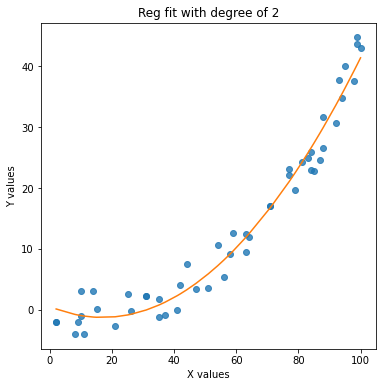

In [26]:
# with degree 2
fit_poly(2)

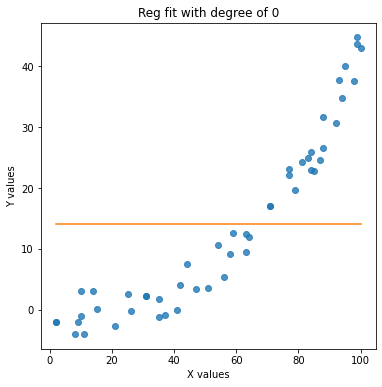

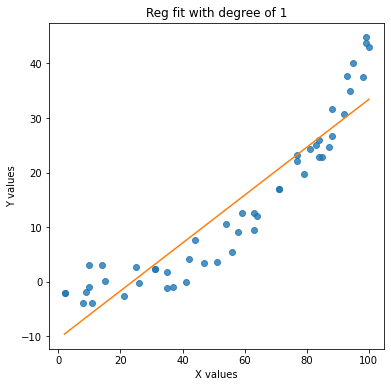

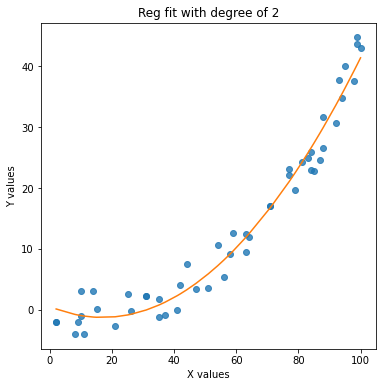

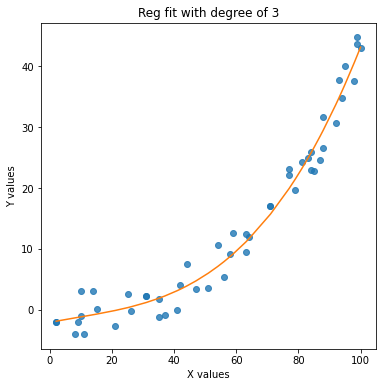

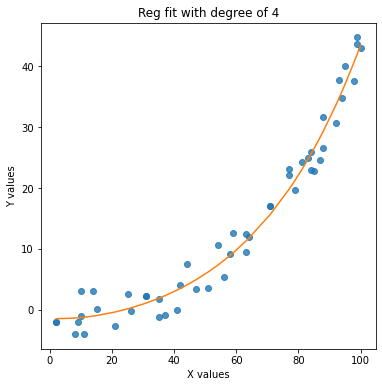

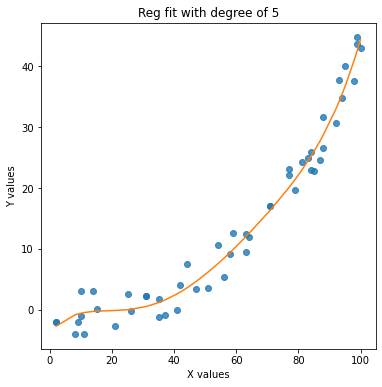

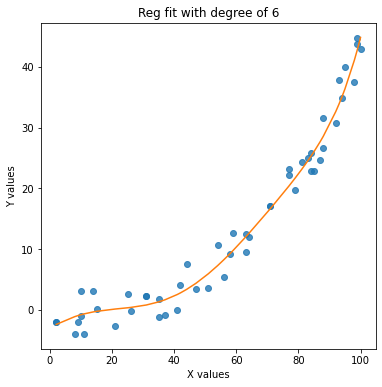

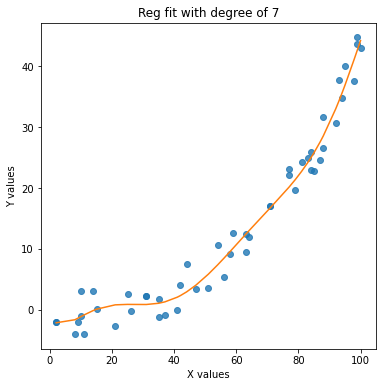

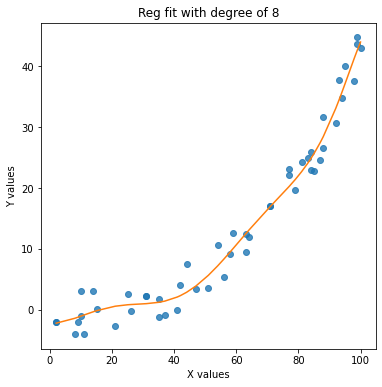

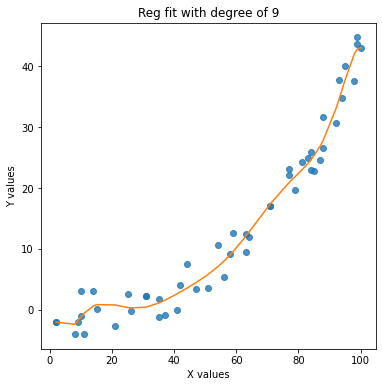

In [27]:
# with degree of 5
for deg in range(10):
    fit_poly(deg)

In [45]:
# split the dataset into train and test data
X_trn, X_tst, y_trn, y_tst = train_test_split(df.x, df.y, test_size=0.20, random_state=42)

# define metrics dataframe
rmse_df = pd.DataFrame(columns =['degree', 'rmse_trn', 'rmse_tst'])

# define rmse function
def get_rmse(y, y_fit):
    return np.sqrt(mean_squared_error(y, y_fit))

# for upto degree 15
for i in range(1,15):
    p = np.polyfit(X_trn,y_trn, deg=i)
    rmse_df.loc[i-1] = [i, get_rmse(y_trn, np.polyval(p, X_trn)), get_rmse(y_tst, np.polyval(p, y_tst))]
    
rmse_df

,degree,rmse_trn,rmse_tst
0,1.0,5.381508,21.520583
1,2.0,2.402382,22.687331
2,3.0,2.221174,22.161648
3,4.0,2.220116,22.154457
4,5.0,2.171885,22.273650
5,6.0,2.154547,22.266584
6,7.0,2.141227,22.277884
7,8.0,2.140623,22.257616
8,9.0,2.112392,22.090317
9,10.0,2.105960,22.168733


End of the Notebook